# SVM and Logistic Regression Modeling

## Logistic Regression Model

Please carefully describe every assumption and every step in your report.  
  
  [50 points] Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them more
accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel
only is fine to use.  


## Support Vector Machine Model  
  
  Please carefully describe every assumption and every step in your report.  
    
    
[50 points] Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use.

Below we will go through the creation of three different Support Vector Machines, or SVMs, and examine visual representations of their predictions.  These SVMs will be relatively simple, and only predict based on a given combination of two predictive variables.  This is done so that we can more clearly represent the visualization in a plot.  After these representations we will have another section where we will build and run a more complex SVM which includes more predictive variables and will result in a much higher accuracy.

### Please note that the following code found in this section is based upon concepts and examples found in Chapter 3 of "Machine Learning in Python" by Sebastian Raschka

In [1]:
# This code imports the packages we will be using, and sets parameters for the matplotlib.pylab package.

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline

In [2]:
# Path to where all of the data set files resides 
path = 'C:/Users/ledbeg1/data'

In [3]:
filename = path + '\Indicators.csv'
df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [4]:
# This code merges the data into a more easily manipulated pivot table format.
df_flt = df_indicators[df_indicators.IndicatorCode.isin(['SL.TLF.CACT.MA.ZS','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD','SP.ADO.TFRT'
                                                 ,'SG.GEN.PARL.ZS'])]
df_s = df_flt[['Year','CountryCode','IndicatorCode','Value']]
df_s =df_s.pivot_table(index=['CountryCode','Year'], columns=['IndicatorCode'], values=['Value'])
df_all = df_s['Value']
df_all.reset_index(inplace=True)
df_all.columns.name=None

In [5]:
# For the purposes of these SVMs we will only be interested in values for these countries from the year 2014.
df_all_2014 = df_all[df_all['Year']==2014] 

In [6]:
# This code Imputes missing values in the data based upon a spline method.
df_all_2014 =df_all_2014.reindex(index=df_all_2014.index[::-1])
df_all_2014.interpolate(method='barycentric',order=1, limit_direction='both', inplace=True)
df_all_2014 =df_all_2014.reindex(index=df_all_2014.index[::-1])
df_all_2014.interpolate(method='spline',order=1, limit_direction='both', inplace=True)
df_all_2014

C:\Users\ledbeg1\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
54,ABW,2014,NaN,NaN,NaN,NaN,23.122000
99,ADO,2014,NaN,NaN,50.000000,NaN,47.228253
155,AFG,2014,2.003822e+10,633.569247,27.700000,79.300003,76.733600
211,AGO,2014,1.662486e+10,2598.890818,36.800000,76.800003,166.602800
267,ALB,2014,1.321151e+10,4564.390339,20.000000,65.599998,21.489600
323,ARB,2014,2.845788e+12,7386.428444,17.793970,75.572081,48.228153
379,ARE,2014,3.994513e+11,43962.713693,17.500000,92.900002,29.253800
435,ARG,2014,5.376600e+11,12509.531118,36.600000,75.099998,63.851200
491,ARM,2014,1.164444e+10,3873.533566,10.700000,73.099998,23.508400
547,ATG,2014,1.220976e+09,13432.079330,11.100000,71.796931,45.664200


In [7]:
# There still remains two objects that have NaN values post-imputing, may as well just drop them.
df_all_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 54 to 13174
Data columns (total 7 columns):
CountryCode          237 non-null object
Year                 237 non-null int64
NY.GDP.MKTP.CD       235 non-null float64
NY.GDP.PCAP.CD       235 non-null float64
SG.GEN.PARL.ZS       236 non-null float64
SL.TLF.CACT.MA.ZS    235 non-null float64
SP.ADO.TFRT          237 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.8+ KB


In [8]:
# dropping the two objects that still had NaNs
df_all_2014 = df_all_2014[df_all_2014['CountryCode'] != 'ABW']
df_all_2014 = df_all_2014[df_all_2014['CountryCode'] != 'ADO']

In [9]:
# Now we have 235 countries with no missing values.
df_all_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 155 to 13174
Data columns (total 7 columns):
CountryCode          235 non-null object
Year                 235 non-null int64
NY.GDP.MKTP.CD       235 non-null float64
NY.GDP.PCAP.CD       235 non-null float64
SG.GEN.PARL.ZS       235 non-null float64
SL.TLF.CACT.MA.ZS    235 non-null float64
SP.ADO.TFRT          235 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.7+ KB


In [95]:
# This code generates a target array of values, with 0 being very poor, 1 being poor, and 2 being rich

i = 0
rangeLength = len(df_all_2014['NY.GDP.MKTP.CD'])
target = []
for i in range(0,rangeLength):
    if df_all_2014['NY.GDP.MKTP.CD'].iloc[i] > 754000000000:
        target.append(2)
    elif df_all_2014['NY.GDP.MKTP.CD'].iloc[i] > 25000000000:
        target.append(1)
    else:
        target.append(0)
print(target)

[0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0]


In [173]:
# Here we select our first two columns to visualize an SVM from: percentage of government seats held by women and adolescent birth rate
# selectedCols = ['SG.GEN.PARL.ZS','SL.TLF.CACT.MA.ZS','SP.ADO.TFRT']
selectedCols = ['SG.GEN.PARL.ZS','SP.ADO.TFRT']
X = df_all_2014[selectedCols]
y = target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [174]:
# This code standardizes our data values, a necessary step to take since some values are represented in percentages and other
# values are represented as very large integers.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [175]:
# This code builds a Perceptron and fits the training data to it.
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [178]:
# This reports the number of samples that were misclassified by the model

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 32


In [179]:
# This reports the accuracy of our predictive model as a percentage value

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.55


In [180]:
# This code defines a plot for our SVMs we will be analyzing.  As mentioned earlier, this code is based heavily upon code, concepts, 
# and examples found in Chapter 3 of "Machine Learning in Python" by Sebastian Raschka

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

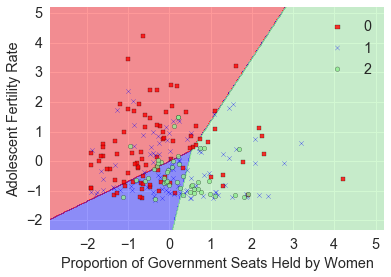

In [191]:
# This code generates a visual plot by calling the plot_decision_regions we defined earlier.

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('Proportion of Government Seats Held by Women')
plt.ylabel('Adolescent Fertility Rate')
plt.legend(loc='upper right')
plt.show()

In [155]:
# Now that we have looked at one plot we will plot the remaining two combinations of columns, starting with
# the Percentage of Government Seats Held by Women and the Labor Force Participation Rate
# selectedCols = ['SG.GEN.PARL.ZS','SL.TLF.CACT.MA.ZS','SP.ADO.TFRT']
selectedCols = ['SG.GEN.PARL.ZS','SL.TLF.CACT.MA.ZS']
X = df_all_2014[selectedCols]
y = target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [156]:
# This code standardizes our data values, a necessary step to take since some values are represented in percentages and other
# values are represented as very large integers.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [157]:
# This code builds a Perceptron and fits the training data to it.
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [159]:
# This reports the number of samples that were misclassified by the model

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 40


In [161]:
# This reports the accuracy of our predictor as a percentage

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.44


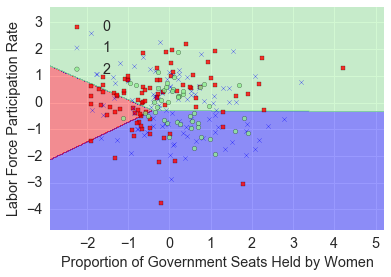

In [163]:
# This code generates a visual plot by calling the plot_decision_regions we defined earlier.

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('Proportion of Government Seats Held by Women')
plt.ylabel('Labor Force Participation Rate')
plt.legend(loc='lower right')
plt.show()

In [164]:
# Finally we will plot the Adolescent Birth Rate together with the Labor Force Participation Rate.
# selectedCols = ['SG.GEN.PARL.ZS','SL.TLF.CACT.MA.ZS','SP.ADO.TFRT']
selectedCols = ['SP.ADO.TFRT','SL.TLF.CACT.MA.ZS']
X = df_all_2014[selectedCols]
y = target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [165]:
# This code standardizes our data values, a necessary step to take since some values are represented in percentages and other
# values are represented as very large integers.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [166]:
# This code builds a Perceptron and fits the training data to it.
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [167]:
# This reports the number of samples that were misclassified by the model

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 58


In [168]:
# This reports the accuracy of our predictor as a percentage

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.18


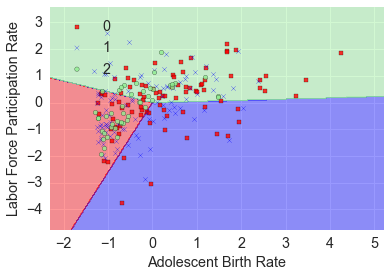

In [169]:
# This code generates a visual plot by calling the plot_decision_regions we defined earlier.

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('Adolescent Birth Rate')
plt.ylabel('Labor Force Participation Rate')
plt.legend(loc='lower right')
plt.show()

Based upon what we have seen in the visualizations above, the most predictive combination of columns is found by combining the Percentage of Government Seats Held by Women with the Adolescent Birth Rate which had a predictive accuracy of 55%, compared with 44% and 18% for the other models.  This can be seen in the visualizations as well, where we see that the more accurate models show the red "very poor" countries in the predicted red area more often, while the less predictive visualizations have less correlation between the classification of a given object and the predictive area.  
  
In the following section we will now run a similar SVM but with many more indicators used as predictive variables than what we have used thus far.  The expectation is that by using additional predictive variables we will be able to achieve predictive accuracy much higher than 55%, even if the predictions will not be as easily visualized in graph form.

## Compare the advantages of each model  
  
   Please carefully
describe every assumption and every step in your report.  
  
   [10 points] Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.

## Use Weights to Interpret the Importance of each Feature  
  
  Please carefully describe every assumption and every step in your report.  
    
    [30 points] Use the weights from logistic regression to interpret the importance of different features for each classification task. Explain your interpretation in detail. Why do you think some variables are more important?

## Interpret the chosen Support Vectors  
  
  Please carefully describe every assumption and every step in your report.  
    
     [10 points] Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain.